Hey everyone. This is my very first data analysis work after deciding to move on from gulping down voluminous textbooks and courses to some hands on analysis and prediction.  Any comments/helpful suggestions will be welcome and greatly appreciated. So let's get started!

## PART I: Data Wrangling

In this part, I am going to try and explore the data to check for missing values/erroneous entries and also comment on redundant features and add additional ones, if needed.

First, let us load the necessary packages and get an overview of what we are dealing with.

In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set_style("whitegrid")

noShow = pds.read_csv('../data/No-show-Issue-Comma-300k.csv')
print(noShow.head())

   Age Gender AppointmentRegistration        ApointmentData DayOfTheWeek  \
0   19      M    2014-12-16T14:46:25Z  2015-01-14T00:00:00Z    Wednesday   
1   24      F    2015-08-18T07:01:26Z  2015-08-19T00:00:00Z    Wednesday   
2    4      F    2014-02-17T12:53:46Z  2014-02-18T00:00:00Z      Tuesday   
3    5      M    2014-07-23T17:02:11Z  2014-08-07T00:00:00Z     Thursday   
4   38      M    2015-10-21T15:20:09Z  2015-10-27T00:00:00Z      Tuesday   

    Status  Diabetes  Alcoolism  HiperTension  Handcap  Smokes  Scholarship  \
0  Show-Up         0          0             0        0       0            0   
1  Show-Up         0          0             0        0       0            0   
2  Show-Up         0          0             0        0       0            0   
3  Show-Up         0          0             0        0       0            0   
4  Show-Up         0          0             0        0       0            0   

   Tuberculosis  Sms_Reminder  AwaitingTime  
0             0       

### 1.1. Getting rid of typos!

It is immediately apparent that some of the column names have typos, so let us clear them up before continuing further, so that I don't have to use alternate spellings everytime I need a variable.

In [11]:
noShow.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

print(noShow.columns)

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')


### 1.2. Messing around with time

For convenience, I am going to convert the AppointmentRegistration and Appointment columns into datetime64 format and the AwaitingTime column into absolute values.

In [12]:
noShow.AppointmentRegistration = noShow.AppointmentRegistration.apply(np.datetime64)
noShow.AppointmentData = noShow.AppointmentData.apply(np.datetime64)
noShow.AwaitingTime = noShow.AwaitingTime.apply(abs)

print(noShow.AppointmentRegistration.head())
print(noShow.AppointmentData.head())
print(noShow.AwaitingTime.head())

0   2014-12-16 14:46:25
1   2015-08-18 07:01:26
2   2014-02-17 12:53:46
3   2014-07-23 17:02:11
4   2015-10-21 15:20:09
Name: AppointmentRegistration, dtype: datetime64[ns]
0   2015-01-14
1   2015-08-19
2   2014-02-18
3   2014-08-07
4   2015-10-27
Name: AppointmentData, dtype: datetime64[ns]
0    29
1     1
2     1
3    15
4     6
Name: AwaitingTime, dtype: int64


It is interesting to note that the time portions have vanished from the Appointment Data timedeltas, because all appointment times were set exactly to 00:00:00. Also, if it's not clear already, the AwaitingTime is the rounded number of days from registration to appointment. Here is the proof:

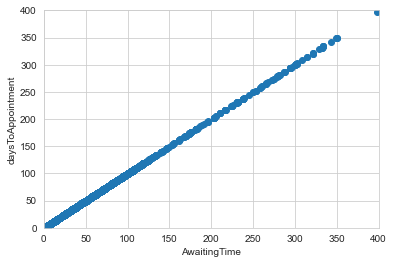

In [13]:
daysToAppointment = noShow.AppointmentData - noShow.AppointmentRegistration
daysToAppointment = daysToAppointment.apply(lambda x: x.total_seconds() / (3600 * 24))
plt.scatter(noShow.AwaitingTime, daysToAppointment)
plt.axis([0, 400, 0, 400])
plt.xlabel('AwaitingTime')
plt.ylabel('daysToAppointment')
plt.show()

We also create a new feature called HourOfTheDay, which will indicate the hour of the day at which the appointment was booked. This will be derived off AppointmentRegistration, thus:

In [14]:
def calculateHour(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

noShow['HourOfTheDay'] = noShow.AppointmentRegistration.apply(calculateHour)

### 1.3. Checking for errors and NaNs

Next we check for any erroneous values and NaNs in data.

In [15]:
print('Age:',sorted(noShow.Age.unique()))
print('Gender:',noShow.Gender.unique())
print('DayOfTheWeek:',noShow.DayOfTheWeek.unique())
print('Status:',noShow.Status.unique())
print('Diabetes:',noShow.Diabetes.unique())
print('Alchoholism:',noShow.Alchoholism.unique())
print('Hypertension:',noShow.Hypertension.unique())
print('Handicap:',noShow.Handicap.unique())
print('Smokes:',noShow.Smokes.unique())
print('Scholarship:',noShow.Scholarship.unique())
print('Tuberculosis:',noShow.Tuberculosis.unique())
print('Sms_Reminder:',noShow.Sms_Reminder.unique())
print('AwaitingTime:',sorted(noShow.AwaitingTime.unique()))
print('HourOfTheDay:', sorted(noShow.HourOfTheDay.unique()))

Age: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 108, 113]
Gender: ['M' 'F']
DayOfTheWeek: ['Wednesday' 'Tuesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']
Status: ['Show-Up' 'No-Show']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [0 1]
Handicap: [0 1 2 3 4]
Smokes: [0 1]
Scholarship: [0 1]
Tuberculosis: [0 1]
Sms_Reminder: [0 1 2]
AwaitingTime: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

It is clear that we do not have any NaNs anywhere in the data. However, we do have some impossible ages such as -2 and -1, and some pretty absurd ages such as 100 and beyond. I do admit that it is possible to live 113 years and celebrate living so long, and some people do live that long, but most people don't. So I will treat the ages greater than 95 as outliers. 

Once I have made my assumptions, it is time to remove the impossible and the absurd from the data.

In [16]:
noShow = noShow[(noShow.Age >= 0) & (noShow.Age <= 95)]

### 1.4. Checking for outliers in AwaitingTime

[(0.0, 500.0)]

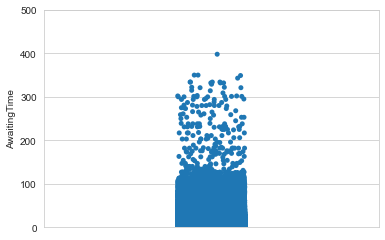

In [21]:
g = sns.stripplot(data = noShow, y = 'AwaitingTime', jitter = True)
g.set(ylim = (0, 500))

Clearly, the data starts to thin out after 150 days AwaitingTime. There is one observation at 398 days, which is likely an outlier. There are almost no observations beyond 350 days, so let us remove anything beyond 350 days which will include that 398 day observation too.

In [22]:
noShow = noShow[noShow.AwaitingTime < 350]

## PART II: EXPLORING THE DATA

Now we are all set to explore the different features of the data and determine how good a feature it is for prediction whether a patient is likely to show up at an appointment.

### 2.1. Analyzing the probability of showing up with respect to different features

In [23]:
def probStatus(dataset, group_by):
    df = pds.crosstab(index = dataset[group_by], columns = dataset.Status).reset_index()
    df['probShowUp'] = df['Show-Up'] / (df['Show-Up'] + df['No-Show'])
    return df[[group_by, 'probShowUp']]

First we will check how the likelihood that a person will show up at an appointment changes with respect to Age, HourOfTheDay, AwaitingTime.

AttributeError: module 'seaborn' has no attribute 'plt'

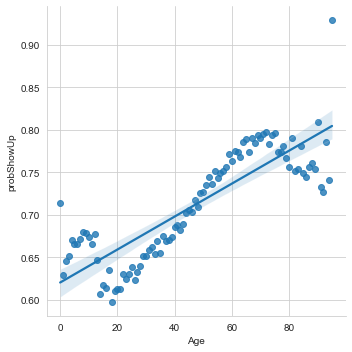

In [24]:
sns.lmplot(data = probStatus(noShow, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 100)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()

sns.lmplot(data = probStatus(noShow, 'HourOfTheDay'), x = 'HourOfTheDay', 
           y = 'probShowUp', fit_reg = True)
sns.plt.title('Probability of showing up with respect to HourOfTheDay')
sns.plt.show()

sns.lmplot(data = probStatus(noShow, 'AwaitingTime'), x = 'AwaitingTime', 
           y = 'probShowUp', fit_reg = True)
sns.plt.title('Probability of showing up with respect to AwaitingTime')
sns.plt.ylim(0, 1)
sns.plt.show()

Clearly, HourOfTheDay and AwaitingTime are not good predictors of Status, since the probability of showing up depends feebly on the HourOfTheDay and not at all on the AwaitingTime. The significantly stronger dependency is observed with respect to Age.

Next, we do the same analysis for the other variables except AppointmentRegistration and AppointmentData since we have already analyzed the probability of showing up with respect to HourOfTheDay and AwaitingTime.

AttributeError: module 'seaborn' has no attribute 'plt'

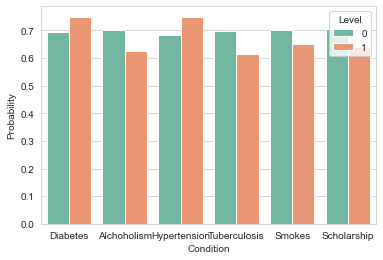

In [25]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in noShow[item].unique():
            row = {'Condition': item}
            total = len(noShow[noShow[item] == level])
            n = len(noShow[(noShow[item] == level) & (noShow.Status == 'Show-Up')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pds.DataFrame(rows)

sns.barplot(data = probStatusCategorical(['Diabetes', 'Alchoholism', 'Hypertension',
                                         'Tuberculosis', 'Smokes', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

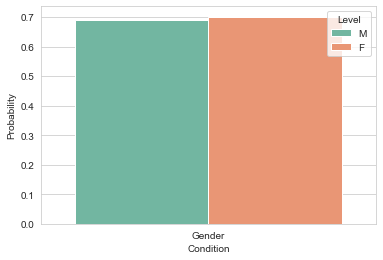

In [26]:
sns.barplot(data = probStatusCategorical(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

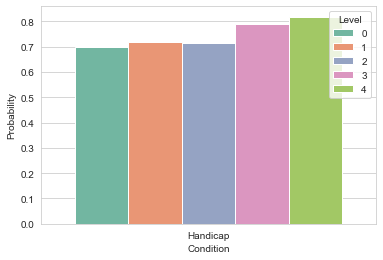

In [27]:
sns.barplot(data = probStatusCategorical(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

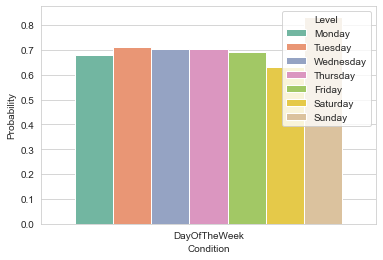

In [28]:
sns.barplot(data = probStatusCategorical(['DayOfTheWeek']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2',
           hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                       'Saturday', 'Sunday'])
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

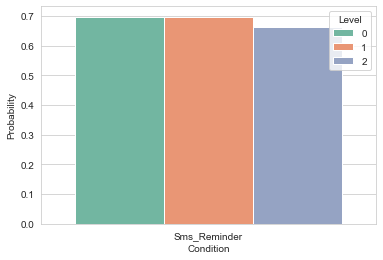

In [29]:
sns.barplot(data = probStatusCategorical(['Sms_Reminder']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

### 2.2. Bayesian Analysis

Now we are going to determine which features are most responsible for a no-show status. We do this by calculating the posterior probabilities of the different features given a no-show status.

AttributeError: module 'seaborn' has no attribute 'plt'

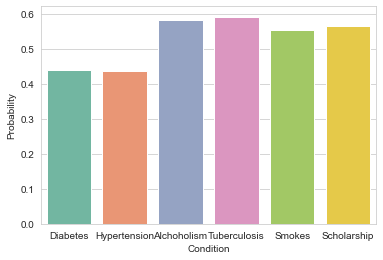

In [30]:
def posteriorNoShow(condition):
    levels = list(noShow[condition].unique())
    if condition not in ['DayOfTheWeek', 'Gender']: 
        levels.remove(0)
    rows = []
    for level in levels:
        p = len(noShow[noShow[condition] == level]) / len(noShow)
        p1 = len(noShow[(noShow[condition] == level) & (noShow.Status == 'No-Show')]) / len(noShow[noShow.Status == 'No-Show'])
        p2 = len(noShow[(noShow[condition] == level) & (noShow.Status == 'Show-Up')]) / len(noShow[noShow.Status == 'Show-Up'])
        if len(levels) > 1:
            rows.append({'Levels': level, 
                         'Probability': (p * p1) / (p * p1 + p * p2)})
        else:
            rows.append({'Condition': condition,
                         'Probability': (p * p1) / (p * p1 + p * p2)})
    return rows
    
tuples = []
tuples.extend(posteriorNoShow('Diabetes'))
tuples.extend(posteriorNoShow('Hypertension'))
tuples.extend(posteriorNoShow('Alchoholism'))
tuples.extend(posteriorNoShow('Tuberculosis'))
tuples.extend(posteriorNoShow('Smokes'))
tuples.extend(posteriorNoShow('Scholarship'))

sns.barplot(data = pds.DataFrame(tuples)[['Condition', 'Probability']], 
            x = 'Condition', y = 'Probability', palette = 'Set2')
sns.plt.title('Posterior probability of diseases and scholarship given a no-show')
sns.plt.ylabel('Probability')
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

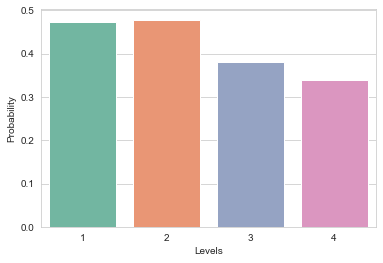

In [31]:
sns.barplot(data = pds.DataFrame(posteriorNoShow('Handicap')), 
            x = 'Levels', y = 'Probability', palette = 'Set2')
sns.plt.xlabel('Handicap Levels')
sns.plt.ylabel('Probability')
sns.plt.title('Posterior probability of Handicap given a no-show')
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

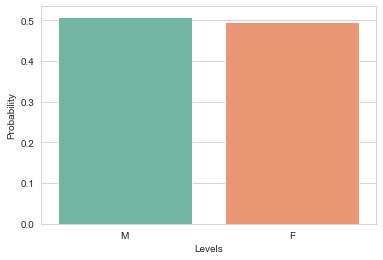

In [32]:
sns.barplot(data = pds.DataFrame(posteriorNoShow('Gender')), 
            x = 'Levels', y = 'Probability', palette = 'Set2')
sns.plt.xlabel('Gender')
sns.plt.ylabel('Probability')
sns.plt.title('Posterior probability of Gender given a no-show')
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

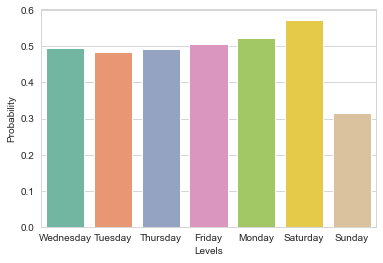

In [33]:
sns.barplot(data = pds.DataFrame(posteriorNoShow('DayOfTheWeek')), 
            x = 'Levels', y = 'Probability', palette = 'Set2')
sns.plt.xlabel('DayOfTheWeek')
sns.plt.ylabel('Probability')
sns.plt.title('Posterior probability of DayOfTheWeek given a no-show')
sns.plt.show()

Note that we are not considering Sms_Reminder as a cause because it is not a cause for not showing up, rather it is a feature of interest that is unrelated with showing/not-showing to the appointment.

## PART III: PREDICTING WHETHER A PERSON WILL BE SHOWING UP 

In this section I am going to try and predict the Show-Up/No-Show status based on the features which show the most variation in probability of showing up. They are:

1. Age
2. Diabetes
3. Alchoholism
4. Hypertension
5. Smokes
6. Scholarship
7. Tuberculosis

### 3.1. Preliminary preparation

First we will prepare the data by converting the factor variables into numerical values.

In [34]:
def dayToNumber(day):
    if day == 'Monday': 
        return 0
    if day == 'Tuesday': 
        return 1
    if day == 'Wednesday': 
        return 2
    if day == 'Thursday': 
        return 3
    if day == 'Friday': 
        return 4
    if day == 'Saturday': 
        return 5
    if day == 'Sunday': 
        return 6

noShow.Gender = noShow.Gender.apply(lambda x: 1 if x == 'M' else 0)
noShow.DayOfTheWeek = noShow.DayOfTheWeek.apply(dayToNumber)
noShow.Status = noShow.Status.apply(lambda x: 1 if x == 'Show-Up' else 0)

Then, we split the data into training and testing data. After a lot of trial and error, I have found that about 296500 samples in the training data are most helpful to our classifier to properly get the best fit. Beyond that it overfits and below that it underfits. That is why I am using 296500 as sample size for our training data.

In [35]:
features_train = noShow[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',
                         'Alchoholism', 'Scholarship']].iloc[:296500]

labels_train = noShow.Status[:296500]

features_test = noShow[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',
                         'Alchoholism', 'Scholarship']].iloc[296500:]

labels_test = noShow.Status[296500:]

### 3.2. Predicting status

Since each feature in the training/testing sets contains a specific set of discrete values, i.e. Age contains integers from 0 to 95 and the other features are flags that contain only 0 or 1, I can safely assume that for Naive Bayes classification, P(x|y) follows a multinomial distribution. In that light, I will use the Multinomial Naive Bayes classifier to fit the data.

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB().fit(features_train, labels_train)
print('Accuracy:', round(accuracy_score(labels_test, 
                                        clf.predict(features_test)), 2) * 100, '%')

Accuracy: 71.0 %


An accuracy of 71% is although not good enough for real life applications, for this particular dataset, this was as far as I could go. I am not yet skilled enough to fine tune parameters of different classifiers enough to beat this score, so readers are encouraged to try it themselves and see if they can beat it. 

The second thing about this dataset I want to stress about is that the accuracy could have been greater if there had been more relevant features, such as more disease records or maybe some measure of how busy the schedule of a person is. 

Until next time. :)

UPDATE:

Upgraded some of the plots, added Bayesian analysis.